<a href="https://colab.research.google.com/github/yongju-Shin/Section2-project/blob/main/section2_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 문제 정의 및 데이터 선정

- 관심 도메인 -> 의료 

- 프로젝트에 사용할 데이터셋 -> 심혈관 질환 데이터 셋

- 하위 주제에서 해결하고자 하는 문제 
 -> 건강검진 시 간단한 정보를 통해 심혈관질환 의삼자를 분류하여 빠른 검사를 진행하여 조치 

### 문제정의 
- 발표자는 보건복지부 연구과제를 맡은 데이터 사이언티스트 
- 전 세계적으로 주요 사망원인으로 손꼽히는 심혈관 질환은 심장과 뇌에 혈액을 공급하는 혈관에 이상이 생긴 질환을 말하며 높은 사망률을 가지고 있어서 조기 검진이 필요함. 
- 그러나 농촌지역에서는 의료에 대한 지식이나 인지가 부족하고 의료불균형이 존재하여 조기검진이 어렵고 증상이 나타난 이후에야 병원을 방문하는경우가 많다.  
- 따라서 간단한 건강검진 데이터를 통해 심혈관 질환 의심자를 분류하고 빠른 조기 검진 및 치료를 제공하기위한 시스템 구축이 필요함 
- 해당 시스템을 통해 농촌지역의 심혈관질환 조기검진을 위한 도움을 주고  의료 불균형 문제를 조금이라도 해소하려고 한다. 

###유형 / 타겟
분류 - 건강검진데이터를 통해 심혈관질환 의심/미의심으로 분류 

###평가지표 
f1 score 
의료데이터에서는 리콜이 중요하지만 너무 리콜에 의존할 경우 이론상 프리시전이 0에 가까워질 수 있다. 이는 곧 모든 고객을 병이 있다고 분류하는것이기때문에 두 지표의 균형을 위해 f1 score 로 선정 
 
###가설 
- 가설 1: 조기 검진을 위해 수집한 건강검진 데이터중 혈압이 높은 환자는 심혈관질환 보유할 확률이 높을 것 이다. 
-  가설 2: 60대 이상 환자의  심혈관 질환 보유할 확률이 높을 것 이다. 
###해당 특성을 target으로 지정한 이유를 설명하세요.
-  우리의 목표는 조기에 심혈관질환의심자를 분류하여 조기 진단 및 치료가 목표이므로 심혈관질환 보유여부를 설정 

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [156]:
!pip install category_encoders 
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 52.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.6.2 which is incompatible.


In [157]:
from google.colab import files 
files.upload()

Saving cardio_train.csv to cardio_train (1).csv


{'cardio_train.csv': b'id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio\n0;18393;2;168;62.0;110;80;1;1;0;0;1;0\n1;20228;1;156;85.0;140;90;3;1;0;0;1;1\n2;18857;1;165;64.0;130;70;3;1;0;0;0;1\n3;17623;2;169;82.0;150;100;1;1;0;0;1;1\n4;17474;1;156;56.0;100;60;1;1;0;0;0;0\n8;21914;1;151;67.0;120;80;2;2;0;0;0;0\n9;22113;1;157;93.0;130;80;3;1;0;0;1;0\n12;22584;2;178;95.0;130;90;3;3;0;0;1;1\n13;17668;1;158;71.0;110;70;1;1;0;0;1;0\n14;19834;1;164;68.0;110;60;1;1;0;0;0;0\n15;22530;1;169;80.0;120;80;1;1;0;0;1;0\n16;18815;2;173;60.0;120;80;1;1;0;0;1;0\n18;14791;2;165;60.0;120;80;1;1;0;0;0;0\n21;19809;1;158;78.0;110;70;1;1;0;0;1;0\n23;14532;2;181;95.0;130;90;1;1;1;1;1;0\n24;16782;2;172;112.0;120;80;1;1;0;0;0;1\n25;21296;1;170;75.0;130;70;1;1;0;0;0;0\n27;16747;1;158;52.0;110;70;1;3;0;0;1;0\n28;17482;1;154;68.0;100;70;1;1;0;0;0;0\n29;21755;2;162;56.0;120;70;1;1;1;0;1;0\n30;19778;2;163;83.0;120;80;1;1;0;0;1;0\n31;21413;1;157;69.0;130;80;1;1;0;0;1;0\n32;23046;1;158;90.0

In [158]:
#기본 라이브러리
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# EDA
from pandas_profiling import ProfileReport
# 기준모델
from sklearn.tree import DecisionTreeClassifier
# 데이터 분리
from sklearn.model_selection import train_test_split
# 모델 생성
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# 평가지표
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# 하이퍼파라메터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
# 기타
import warnings
warnings.filterwarnings('ignore')

In [159]:
df=pd.read_csv('cardio_train.csv', sep=';',index_col=0)

In [160]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

### 1. EDA

1-1  데이터 탐색

In [161]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [162]:
df_copy=df.copy()

In [163]:
# 데이터 기본정보 확인 
# 결측치, 데이터 타입, 데이터 갯수, 컬럼명 
# 몸무게 확인해보고 소숫점 없으면 정수형으로 변환 
# gender, cholesterol~cardio까지 바이너리한 건강검진 조사데이터이므로 오브젝트 변경(연산을 하지않기에)
# 결측치가 없다고 되어있지만 확인이 필요
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [164]:
# 수치형데이터 분포 확인
# 혈압 min 데이터에 - 가 있어서 변환이 필요할듯 
# 혈압 최대치가 1만대가 있어서 이상치 제거 필요
# 혈압쪽에 데이터 이상치가 많아서 혈압부분을 자세히 보아야할듯 - 박스플롯 , 밸류 카운트 
# age가 태어난 날짜로 되어있어서 나이로 전환이 필요할 듯 
df_copy.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

1-2 중복 데이터 처리

In [165]:
df_copy.duplicated().sum()

24

In [166]:
df_copy[df_copy.duplicated()]

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
15094  20495       1     165    70.0    120     80            1     1      0   
31110  16793       1     165    68.0    120     80            1     1      0   
54977  18988       1     164    65.0    120     80            1     1      0   
57690  14552       1     158    64.0    120     80            1     1      0   
60642  18353       1     169    67.0    120     80            1     1      0   
63776  16937       2     170    70.0    120     80            1     1      0   
64445  21280       1     165    65.0    120     80            1     1      0   
65352  22077       1     175    69.0    120     80            1     1      0   
65438  21230       1     164    62.0    120     80            1     1      0   
69842  21945       1     165    60.0    120     80            1     1      0   
71971  17493       2     169    74.0    120     80            1     1      0   
74969  21943       1     165    65.0    120     80            1     1      0   
80859  17535       2     165    65.0    120     80            1     1      0   
81232  20293       1     162    70.0    110     70            1     1      0   
82698  18955       1     165    75.0    120     80            1     1      0   
83812  19858       1     165    68.0    120     80            1     1      0   
86312  20516       1     164    66.0    120     80            1     1      0   
86345  16805       1     157    67.0    120     80            1     1      0   
88987  18979       1     165    65.0    120     80            1     1      0   
91592  16160       1     168    65.0    120     80            1     1      0   
92891  18210       1     160    60.0    120     80            1     1      0   
93659  21778       1     160    58.0    120     80            1     1      0   
94486  19059       1     165    65.0    120     80            1     1      0   
97521  21119       1     160    60.0    120     80            1     1      0   

       alco  active  cardio  
id                           
15094     0       1       0  
31110     0       1       0  
54977     0       1       0  
57690     0       1       0  
60642     0       1       0  
63776     0       0       0  
64445     0       1       0  
65352     0       1       1  
65438     0       1       0  
69842     0       1       0  
71971     0       1       1  
74969     0       1       1  
80859     0       1       0  
81232     0       1       0  
82698     0       1       1  
83812     0       1       0  
86312     0       0       0  
86345     0       1       0  
88987     0       0       0  
91592     0       1       1  
92891     0       1       0  
93659     0       1       0  
94486     0       1       1  
97521     0       0       1

1-3 결측데이터 처리

In [167]:
df_copy.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

1-4 이상치 처리

<function matplotlib.pyplot.show(*args, **kw)>

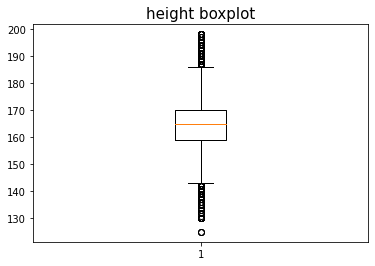

In [256]:
plt.title("height boxplot", size=15)
plt.boxplot(df_copy['height'])
plt.show

In [169]:
df_copy['height'].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57])

In [170]:
drop1=df_copy[df_copy['height'] <= 120] 
drop2=df_copy[df_copy['height'] >= 200]

In [171]:
df_copy=df_copy.drop(drop1.index)
df_copy=df_copy.drop(drop2.index)
df_copy.shape

(69911, 12)

<function matplotlib.pyplot.show(*args, **kw)>

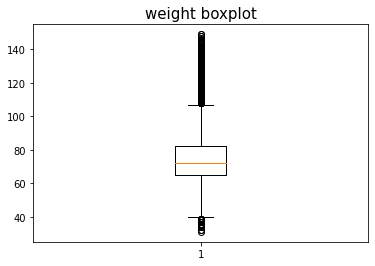

In [257]:
%matplotlib inline
plt.title("weight boxplot", size=15)
plt.boxplot(df_copy['weight'])
plt.show

In [173]:
df_copy['weight']=df_copy['weight'].round().astype(int)

In [174]:
df_copy['weight'].unique()

array([ 62,  85,  64,  82,  56,  67,  93,  95,  71,  68,  80,  60,  78,
       112,  75,  52,  83,  69,  90,  45,  65,  59,  66,  74, 105,  73,
        55,  70,  72,  63,  50, 107,  84,  77,  79,  76,  58, 115,  97,
        53,  57,  49, 110,  94,  92,  87, 103,  88,  99, 100,  61,  48,
        54,  51,  47,  91, 104,  81,  98, 108,  89, 101,  86, 142,  96,
        44,  41, 169, 116, 200, 120, 117, 125, 106, 114, 113, 129, 124,
        42, 123, 111, 102, 109,  46, 139, 150, 138, 131,  43, 134, 121,
        40, 141, 119, 126, 177, 165, 122, 118, 132, 155, 130, 159, 140,
       127, 149, 180, 128,  37, 166, 161, 136, 154, 135, 146,  38, 145,
        39, 133, 153,  34, 167, 156,  35,  31,  30, 152, 168, 163, 162,
       178,  32, 158,  23, 144, 148, 164,  22, 137,  36,  11,  28, 181,
       175,  33, 160, 171, 143,  10, 170,  21,  29, 183, 172, 147])

In [175]:
drop3= df_copy[df_copy['weight'] >= 150]
drop4= df_copy[df_copy['weight'] <= 30]

In [176]:
df_copy=df_copy.drop(drop3.index)
df_copy=df_copy.drop(drop4.index)
df_copy.shape

(69836, 12)

In [177]:
df_copy= df_copy.abs()

In [178]:
drop5= df_copy[df_copy['ap_hi'] >= 200]
drop6= df_copy[df_copy['ap_hi'] <= 100]
df_copy=df_copy.drop(drop5.index)
df_copy=df_copy.drop(drop6.index)
df_copy.shape

(65712, 12)

In [179]:
df_copy['ap_lo'].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    30,   109,    84,
        1033,   150,    50,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,    93,   105, 10000,    99,    77,    59,  8044,
          92,  1044,   108,   115,    68,    61,   106,   102,    94,
          66,    52,    76,    96,   113,    67,  9100,    10,    88,
         902,   130,   112,   104,    71,    72,  1008,    98,    20,
         802,  8000,     8,  1022,   850,   708,   101,  9011,  1011,
          64,     0,  1007,  1177,  7100,    45,   709,  8500,    58,
        1110,  8099,  1088,  1077,  1120,     7,    57,   103,  1125,
         180,   121,    62,  8100,   710,  5700,  8079,  1111,   170,
        1003,  1900,   809,   114,   801,   140,  1002,    53,   111,
           1,   118,   182,   810,     9,  7099,  9800,  8200,   107,
         820,   190,

In [180]:
drop7= df_copy[df_copy['ap_lo'] >= 150]
drop8= df_copy[df_copy['ap_lo'] <= 50]
df_copy=df_copy.drop(drop7.index)
df_copy=df_copy.drop(drop8.index)
df_copy.shape

(64711, 12)

In [181]:
df_copy.describe()

age        gender        height        weight         ap_hi  \
count  64711.000000  64711.000000  64711.000000  64711.000000  64711.000000   
mean   19535.282440      1.355905    164.573875     74.455085    128.154595   
std     2448.642854      0.478790      7.828006     13.956605     15.051338   
min    10859.000000      1.000000    125.000000     31.000000    101.000000   
25%    18006.000000      1.000000    159.000000     65.000000    120.000000   
50%    19741.000000      1.000000    165.000000     72.000000    120.000000   
75%    21382.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    198.000000    149.000000    197.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  64711.000000  64711.000000  64711.000000  64711.000000  64711.000000   
mean      82.067376      1.370972      1.228895      0.088099      0.053592   
std        8.656904      0.685754      0.576515      0.283442      0.225213   
min       52.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max      140.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  64711.000000  64711.000000  
mean       0.803480      0.511366  
std        0.397369      0.499875  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

###2. 기준모델 생성

- DecisiontreeClassifier 모델로 기준모델 생성 
- 기준모델 F1 score = 0.63

In [182]:
target='cardio'

base_train= df.copy()

base_train, base_test = train_test_split(base_train, train_size=0.80, test_size=0.20, 
                              stratify=base_train[target], random_state=2)
base_train.shape, base_test.shape

((56000, 12), (14000, 12))

In [183]:
features = base_train.drop(columns=[target]).columns

In [184]:
X_base_train = base_train[features]
y_base_train = base_train[target]
X_base_test = base_test[features]
y_base_test = base_test[target]

In [185]:
base_model=DecisionTreeClassifier()

In [186]:
base_model.fit(X_base_train,y_base_train)

DecisionTreeClassifier()

In [187]:
y_pred = base_model.predict(X_base_test)
print('베이스 테스트 f1 score:', f1_score(y_pred, y_base_test))

베이스 테스트 f1 score: 0.6360076884744074


### 3. feature engineering

In [188]:
df_copy['age']= (df_copy['age']/365).round().astype(int)

In [189]:
df_copy['age']

id
0        50
1        55
2        52
3        48
8        60
         ..
99993    53
99995    62
99996    52
99998    61
99999    56
Name: age, Length: 64711, dtype: int64

In [190]:
df_copy['bmi']= (df_copy['weight']/((df_copy['height']/100)**2)).round().astype(int)

In [191]:
df_copy['bmi']

id
0        22
1        35
2        24
3        29
8        29
         ..
99993    27
99995    50
99996    31
99998    27
99999    25
Name: bmi, Length: 64711, dtype: int64

In [192]:
df_copy['high_bp']= (df_copy['ap_hi']>140) & (df_copy['ap_lo']>90 )

In [193]:
df_copy['high_bp'].value_counts()

False    61079
True      3632
Name: high_bp, dtype: int64

In [194]:
df_copy

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
0       50       2     168      62    110     80            1     1      0   
1       55       1     156      85    140     90            3     1      0   
2       52       1     165      64    130     70            3     1      0   
3       48       2     169      82    150    100            1     1      0   
8       60       1     151      67    120     80            2     2      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993   53       2     168      76    120     80            1     1      1   
99995   62       1     158     126    140     90            2     2      0   
99996   52       2     183     105    180     90            3     1      0   
99998   61       1     163      72    135     80            1     2      0   
99999   56       1     170      72    120     80            2     1      0   

       alco  active  cardio  bmi  high_bp  
id                                         
0         0       1       0   22    False  
1         0       1       1   35    False  
2         0       0       1   24    False  
3         0       1       1   29     True  
8         0       0       0   29    False  
...     ...     ...     ...  ...      ...  
99993     0       1       0   27    False  
99995     0       1       1   50    False  
99996     1       0       1   31    False  
99998     0       0       1   27    False  
99999     0       1       0   25    False  

[64711 rows x 14 columns]

In [195]:
df_copy['high_bp'].replace(['True','False'],['1','0'],inplace=True)

In [196]:
df_copy

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
0       50       2     168      62    110     80            1     1      0   
1       55       1     156      85    140     90            3     1      0   
2       52       1     165      64    130     70            3     1      0   
3       48       2     169      82    150    100            1     1      0   
8       60       1     151      67    120     80            2     2      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993   53       2     168      76    120     80            1     1      1   
99995   62       1     158     126    140     90            2     2      0   
99996   52       2     183     105    180     90            3     1      0   
99998   61       1     163      72    135     80            1     2      0   
99999   56       1     170      72    120     80            2     1      0   

       alco  active  cardio  bmi  high_bp  
id                                         
0         0       1       0   22    False  
1         0       1       1   35    False  
2         0       0       1   24    False  
3         0       1       1   29     True  
8         0       0       0   29    False  
...     ...     ...     ...  ...      ...  
99993     0       1       0   27    False  
99995     0       1       1   50    False  
99996     1       0       1   31    False  
99998     0       0       1   27    False  
99999     0       1       0   25    False  

[64711 rows x 14 columns]

In [197]:
df_copy.corr()

age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.036830 -0.100753  0.042188  0.183690  0.126178   
gender      -0.036830  1.000000  0.518073  0.150940  0.035290  0.042441   
height      -0.100753  0.518073  1.000000  0.303877 -0.019242  0.002644   
weight       0.042188  0.150940  0.303877  1.000000  0.243580  0.225853   
ap_hi        0.183690  0.035290 -0.019242  0.243580  1.000000  0.692295   
ap_lo        0.126178  0.042441  0.002644  0.225853  0.692295  1.000000   
cholesterol  0.151168 -0.040848 -0.060798  0.140516  0.198730  0.162445   
gluc         0.097192 -0.023999 -0.024234  0.105100  0.091115  0.069672   
smoke       -0.052639  0.336036  0.194706  0.069444  0.027152  0.022596   
alco        -0.031012  0.169644  0.097315  0.066912  0.034351  0.035275   
active      -0.008394  0.004634 -0.011268 -0.017479 -0.001847 -0.000859   
cardio       0.225928 -0.005118 -0.025955  0.164900  0.420317  0.323777   
bmi          0.097182 -0.121915 -0.214401  0.859150  0.256778  0.227417   
high_bp      0.055831  0.022766 -0.007893  0.127397  0.528335  0.551007   

             cholesterol      gluc     smoke      alco    active    cardio  \
age             0.151168  0.097192 -0.052639 -0.031012 -0.008394  0.225928   
gender         -0.040848 -0.023999  0.336036  0.169644  0.004634 -0.005118   
height         -0.060798 -0.024234  0.194706  0.097315 -0.011268 -0.025955   
weight          0.140516  0.105100  0.069444  0.066912 -0.017479  0.164900   
ap_hi           0.198730  0.091115  0.027152  0.034351 -0.001847  0.420317   
ap_lo           0.162445  0.069672  0.022596  0.035275 -0.000859  0.323777   
cholesterol     1.000000  0.452183  0.009786  0.034168  0.009338  0.218066   
gluc            0.452183  1.000000 -0.006140  0.009426 -0.009117  0.084760   
smoke           0.009786 -0.006140  1.000000  0.343394  0.025432 -0.017811   
alco            0.034168  0.009426  0.343394  1.000000  0.023576 -0.009529   
active          0.009338 -0.009117  0.025432  0.023576  1.000000 -0.037652   
cardio          0.218066  0.084760 -0.017811 -0.009529 -0.037652  1.000000   
bmi             0.173994  0.119247 -0.033122  0.015696 -0.012310  0.180750   
high_bp         0.086905  0.038158  0.011849  0.028427  0.000635  0.166109   

                  bmi   high_bp  
age          0.097182  0.055831  
gender      -0.121915  0.022766  
height      -0.214401 -0.007893  
weight       0.859150  0.127397  
ap_hi        0.256778  0.528335  
ap_lo        0.227417  0.551007  
cholesterol  0.173994  0.086905  
gluc         0.119247  0.038158  
smoke       -0.033122  0.011849  
alco         0.015696  0.028427  
active      -0.012310  0.000635  
cardio       0.180750  0.166109  
bmi          1.000000  0.132814  
high_bp      0.132814  1.000000

In [232]:
df_copy['high_age']=df_copy['age'] >= 60 

In [228]:
high_age=df_copy[df_copy['age'] >= 60 ].drop(columns=['bmi']).iloc[:,-2:]

In [230]:
high_age['cardio'].value_counts()

1    10026
0     5078
Name: cardio, dtype: int64

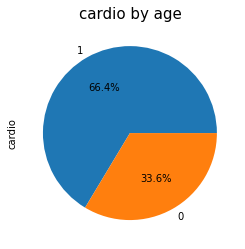

In [255]:
plt.title("cardio by age", size=15)
high_age['cardio'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [198]:
high_cardio=df_copy[df_copy['high_bp'] == True ].drop(columns=['bmi']).iloc[:,-2:]
high_cardio['cardio'].value_counts()

1    3094
0     538
Name: cardio, dtype: int64

In [199]:
high_cardio

cardio  high_bp
id                    
3           1     True
66          1     True
67          1     True
90          1     True
92          1     True
...       ...      ...
99831       1     True
99852       0     True
99864       1     True
99891       1     True
99969       1     True

[3632 rows x 2 columns]

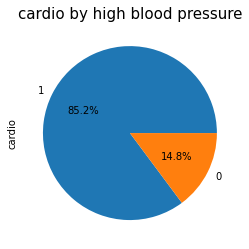

In [254]:
plt.title("cardio by high blood pressure", size=15)
high_cardio['cardio'].value_counts().plot(kind='pie', autopct='%.1f%%')

### 4. 모델링

3-1 데이터 세트 분리

In [235]:
train, val = train_test_split(df_copy, train_size=0.60, test_size=0.40, 
                              stratify=df_copy[target], random_state=2)


train.shape, val.shape

((38826, 15), (25885, 15))

In [236]:
val, test = train_test_split(val, train_size=0.50, test_size=0.50, 
                              stratify=val[target], random_state=2)
train.shape, val.shape, test.shape

((38826, 15), (12942, 15), (12943, 15))

In [237]:
features = df_copy.drop(columns=[target]).columns

In [238]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape 

((38826, 14), (38826,), (12942, 14), (12942,), (12943, 14), (12943,))

4-1 모델링

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=500, random_state=2, n_jobs=-1)
)

dists = {   
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)


clf.fit(X_train, y_train)

In [275]:
pipe_best=clf.best_estimator_

In [276]:
print('f1_score: ',f1_score(y_val, pipe_best.predict(X_val)))

f1_score:  0.7228168140220257


In [277]:
from sklearn.metrics import accuracy_score
print('검증 정확도: ', accuracy_score(y_val, pipe_best.predict(X_val)))

검증 정확도:  0.7238448462370577


In [278]:
pipe_best

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10,
                                        max_features=0.09519303562451653,
                                        n_estimators=500, n_jobs=-1,
                                        random_state=2))])

In [244]:
pipe1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    XGBClassifier(random_state=2, n_estimators=500,learning_rate=0.05)
)

dists = {   
    'simpleimputer__strategy': ['mean', 'median'], 
    'xgbclassifier__min_child_weight':[1,2,3],
    'xgbclassifier__max_depth':[3,5,7,10],
    'xgbclassifier__min_split_loss': [0,1,2,3,4],
}

clf1 = RandomizedSearchCV(
    pipe1, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)


clf1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbclassifier',
                                              XGBClassifier(learning_rate=0.05,
                                                            n_estimators=500,
                                                            random_state=2))]),
                   n_jobs=-1,
                   param_distributions={'simpleimputer__strategy': ['mean',
                                                                    'median'],
                                        'xgbclassifier__max_depth': [3, 5, 7,
                                                                     10],
                                        'xgbclassifier__min_child_weight': [1,
                                                

In [245]:
pipe1_best=clf1.best_estimator_
pipe1_best

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(learning_rate=0.05, max_depth=5,
                               min_child_weight=2, min_split_loss=3,
                               n_estimators=500, random_state=2))])

In [246]:
print('f1_score: ',f1_score(y_val, pipe1_best.predict(X_val)))

f1_score:  0.7198170491286175


In [247]:
print('검증 정확도: ', accuracy_score(y_val, pipe1_best.predict(X_val)))

검증 정확도:  0.7254674702518931


In [280]:
from sklearn.metrics import classification_report

y_pred = pipe_best.predict(X_test)

print(classification_report(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6324
           1       0.74      0.71      0.72      6619

    accuracy                           0.73     12943
   macro avg       0.73      0.73      0.73     12943
weighted avg       0.73      0.73      0.73     12943

f1_score:  0.7246107366953289


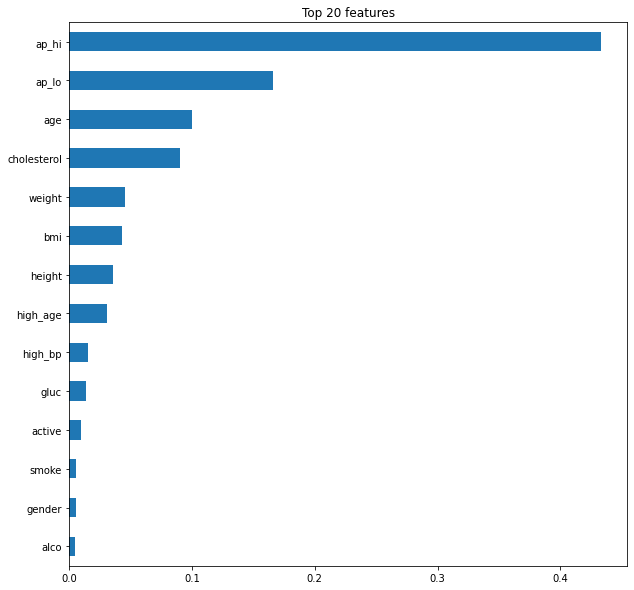

In [273]:
rf = pipe_best.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [269]:
pipeline = clf.best_estimator_

preprocess_pipeline = pipeline['ordinalencoder']
model = pipeline['randomforestclassifier']

X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [261]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [270]:
from pdpbox.pdp import pdp_isolate, pdp_plot

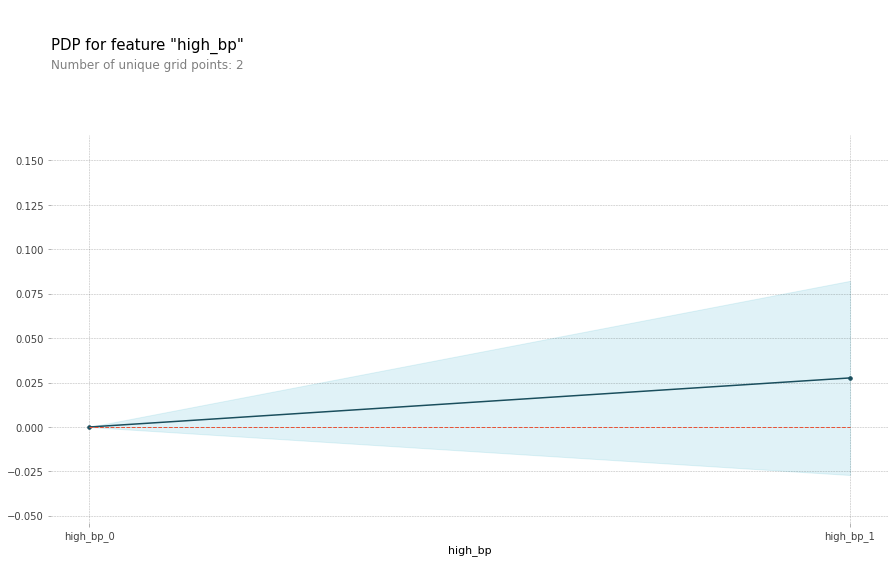

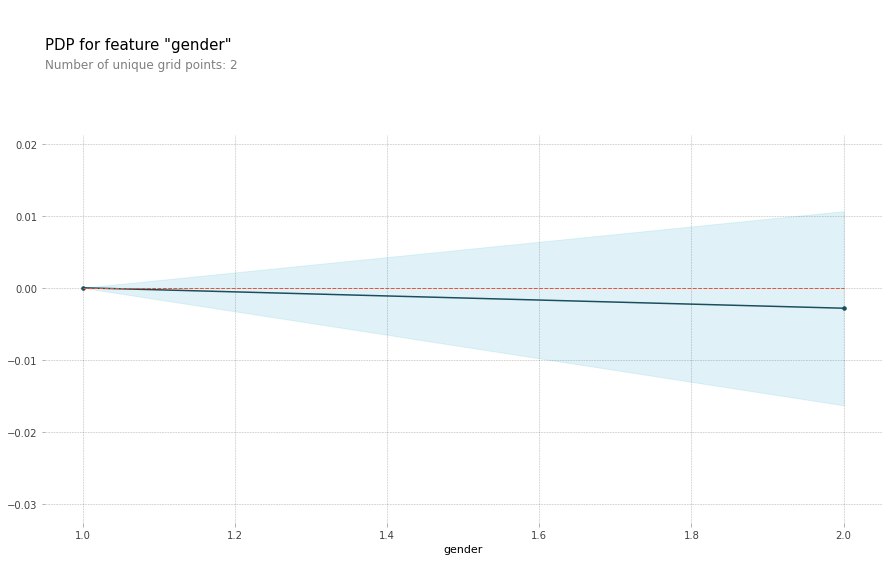

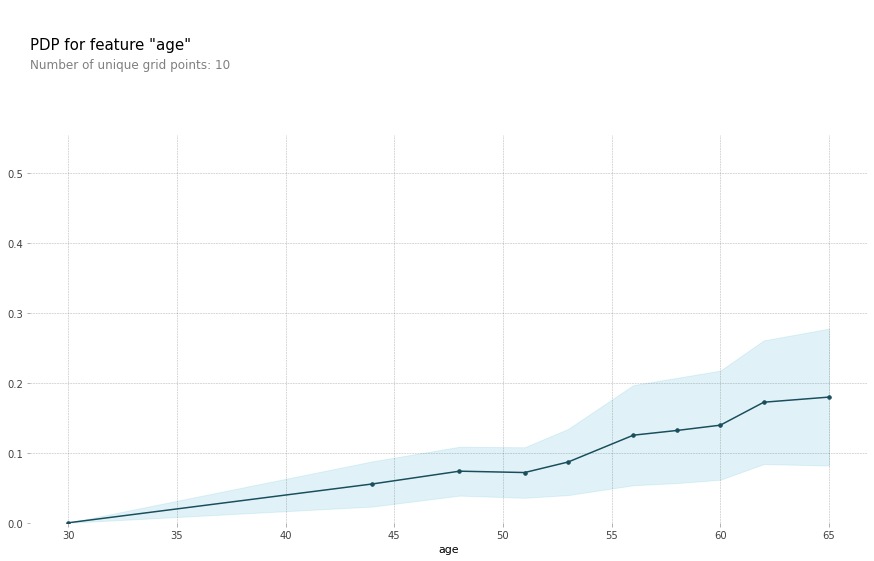

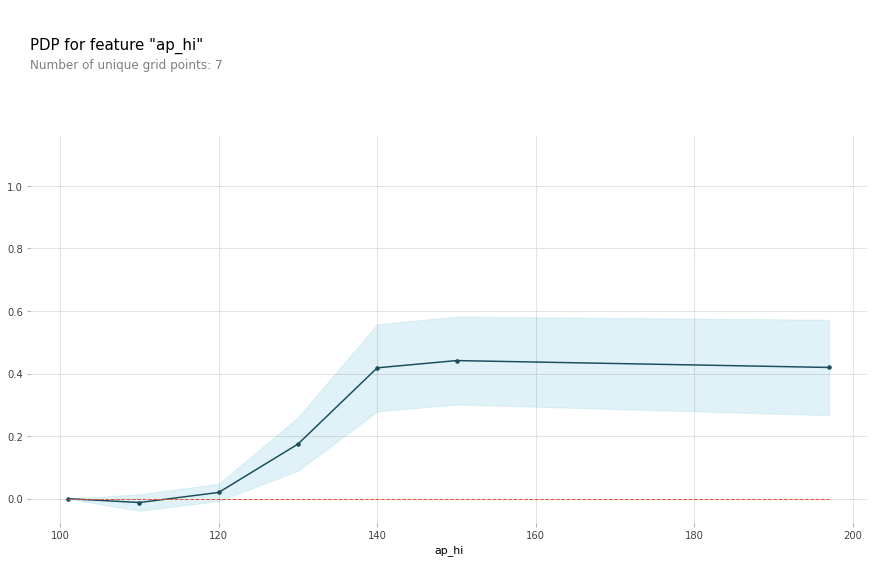

In [271]:
feature=['high_bp','gender','age','ap_hi']

for i,feature in enumerate(feature):
  isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
  )
  pdp_plot(isolated, feature_name=feature);